In [75]:
import imp
import sys  
sys.path.insert(0, '../visual_home_finder')
import config, paths, utilities

imp.reload(utilities)
imp.reload(paths)
imp.reload(config)
import random
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import pickle

plt.rcParams['figure.figsize'] = (10,10)

In [76]:
# Input parameters
num_samples = 300  # Number of sample images from each class to plot

In [77]:
# Load our home feature model - Only do this once since it takes a while to load
home_model = utilities.home_feature_model()

In [78]:
# For each style class, read "num_images" and generate features
features_df = pd.DataFrame([])
for style in config.CLASSES:
    img_paths = list(paths.list_images(os.path.sep.join([config.ORIG_INPUT_DIR, style])))
    total_images = len(img_paths)
    selection = random.sample(range(total_images), num_samples)
    for ii in selection:
        image_feature = utilities.get_features_for_image(img_paths[ii], home_model)
        features_df = features_df.append(pd.DataFrame({"class":style,
                                                    "home_feature":[image_feature]}))

In [79]:
# Use PCA to convert feature to 2-dimensions for plotting
pca = PCA(n_components=2)
features_2d = pca.fit_transform(np.vstack(features_df['home_feature']))
features_df['2D'] = list(features_2d)
pickle.dump(pca, open(config.PCA_MODEL, 'wb'))

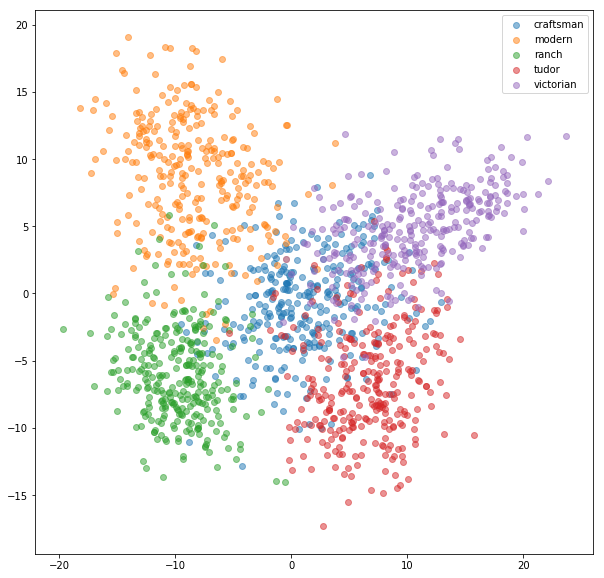

In [80]:
# Scatter plot for different classes
fig_handle = plt.figure()
for style in config.CLASSES:
    plt_array = np.vstack(features_df[features_df['class']==style]['2D'])
    plt.scatter(plt_array[:,0], plt_array[:,1], label=style, alpha = 0.5)
plt.legend()
pickle.dump(fig_handle, open(config.CLUSTER_PLT, 'wb'))

In [81]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
features_2d_tsne = tsne.fit_transform(np.vstack(features_df['home_feature']))
features_df['2DTSNE'] = list(features_2d_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.027s...
[t-SNE] Computed neighbors for 1500 samples in 0.860s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 3.889278
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.598007
[t-SNE] KL divergence after 300 iterations: 1.256592


In [82]:
pickle.dump(features_df, open(config.ALL_FEATURES_DF, 'wb'))

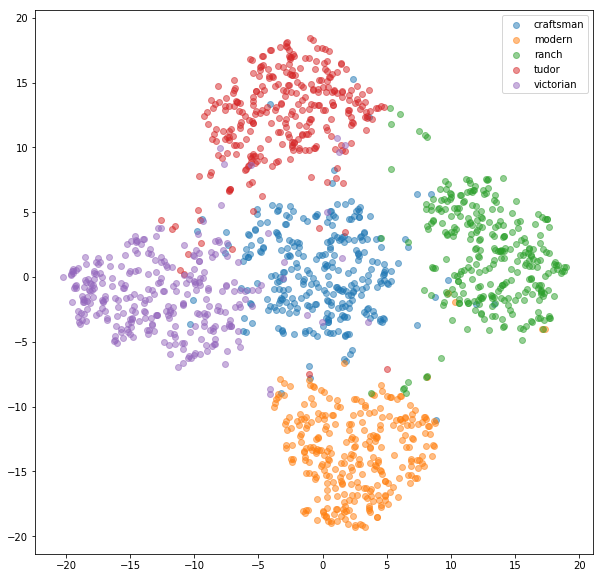

In [83]:
# Scatter plot for different classes
fig_handle = plt.figure()
for style in config.CLASSES:
    plt_array = np.vstack(features_df[features_df['class']==style]['2DTSNE'])
    plt.scatter(plt_array[:,0], plt_array[:,1], label=style, alpha = 0.5)
plt.legend()